Task 1

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


df = pd.read_csv("/home/dang032003/data_visualization/homework/hw1/Homework_sampledata1.txt", sep='\s+', names=['Day', '2008-1', '2008-2', '2008-3', '2008-4', '2008-5', '2008-6', '2008-7', '2008-8', '2008-9', '2008-10', '2008-11', '2008-12'])
df.drop(index=df.index[0], axis=0, inplace=True)
df.drop(columns=df.columns[0], axis=1,  inplace=True)

for col in df.columns:
    date_format = '%Y-%m'
    date=datetime.strptime(col, date_format)
    temp = df.iloc[0][col]
    print(str(date) + " " + str(temp))

2008-01-01 00:00:00 10.5
2008-02-01 00:00:00 7.3
2008-03-01 00:00:00 10.8
2008-04-01 00:00:00 18.2
2008-05-01 00:00:00 20.0
2008-06-01 00:00:00 25.3
2008-07-01 00:00:00 27.2
2008-08-01 00:00:00 25.1
2008-09-01 00:00:00 25.8
2008-10-01 00:00:00 23.0
2008-11-01 00:00:00 24.9
2008-12-01 00:00:00 12.6


Task 2

In [2]:
df1 = df.values.T.tolist()
daily_temp = np.ravel(df1)
daily_temp[daily_temp == -99] = np.nan
start_date = '2008-01-01'
end_date = '2008-12-31'
date_range = pd.date_range(start=start_date, end=end_date)
date_range_truncated = date_range[:len(daily_temp)]
daily_temp_truncated = daily_temp[:len(date_range)]

In [3]:
print(df1)

[[10.5, 9.8, 10.7, 15.1, 13.5, 16.0, 15.8, 15.8, 18.0, 20.2, 18.3, 20.9, 17.4, 14.5, 11.5, 12.4, 13.3, 15.3, 17.8, 18.9, 16.1, 12.9, 13.8, 11.6, 12.9, 12.5, 13.5, 13.3, 12.0, 9.6, 8.6], [7.3, 10.4, 11.0, 12.9, 11.4, 11.0, 10.3, 12.1, 11.7, -99.0, 10.6, 10.9, 11.3, 10.8, 12.2, 13.1, 11.6, 12.4, 12.5, 12.1, 11.2, 13.6, 15.3, 17.2, 16.9, 11.8, 13.0, 12.6, 10.4, -99.0, -99.0], [10.8, 10.7, 11.7, 12.4, 16.0, 16.7, 17.1, 16.9, 17.8, 18.0, 17.5, 18.1, 19.0, 18.5, 19.6, 21.0, 22.0, 19.6, 20.7, 22.9, 22.1, 18.1, 15.3, 17.0, 19.3, 18.0, 19.8, 20.9, 22.2, 21.5, 19.3], [18.2, 18.0, 18.8, 20.4, 22.4, 23.6, 23.6, 26.4, 23.8, 23.8, 24.3, 24.8, 22.6, 23.7, 24.6, 22.3, 22.0, 23.0, 24.0, 24.6, 25.4, 24.0, 18.4, 20.9, 20.4, 21.5, 21.9, 21.7, 23.5, 24.0, -99.0], [20.0, 25.4, 25.4, 26.5, 24.0, 24.0, 25.1, 25.1, 22.5, 19.8, 22.4, 23.2, 21.4, 22.6, 22.4, 25.0, 26.0, 20.8, 21.4, 23.0, 24.0, 24.5, 25.9, 26.2, 25.3, 27.1, 26.9, 28.2, 27.8, 23.6, 24.4], [25.3, 24.8, 26.5, 25.2, 26.0, 26.2, 27.8, 24.8, 26.2, 24.9

Task 3

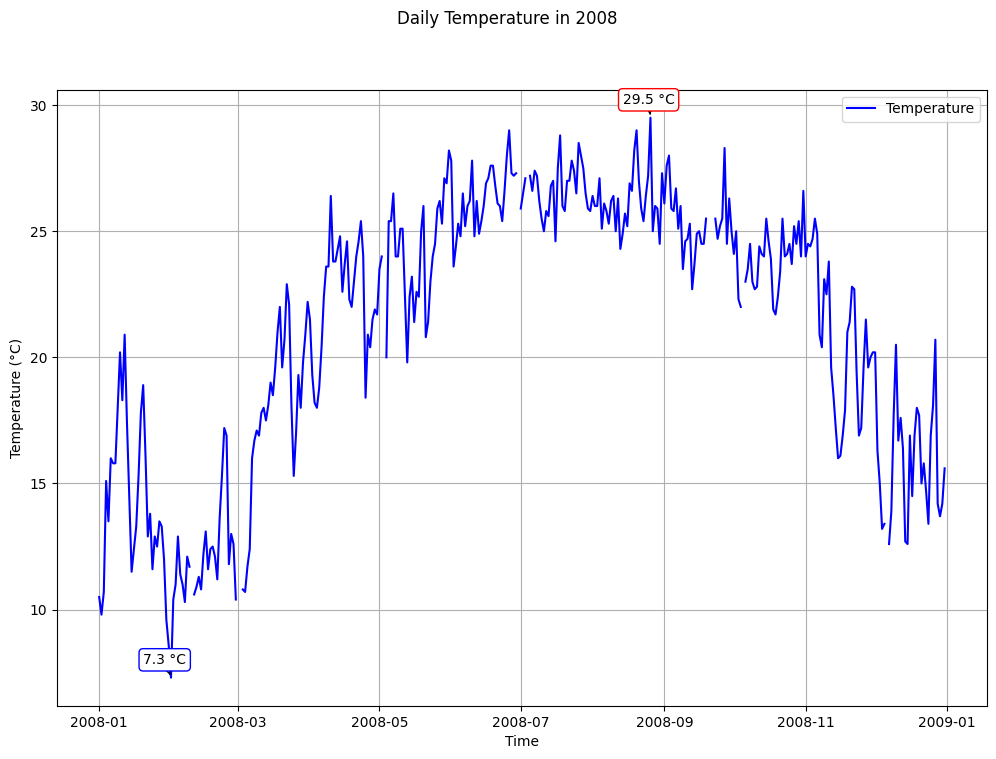

In [4]:
#Plotting
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax.plot(date_range_truncated, daily_temp_truncated, linestyle='-', color='b')
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (°C)')
ax.legend(['Temperature'])

#Highest temp
highest_temp_index = np.nanargmax(daily_temp)
annotate_highest_temp = daily_temp_truncated[highest_temp_index]
ax.annotate(f'{annotate_highest_temp:.1f} °C', 
            xy=(date_range[highest_temp_index], annotate_highest_temp),
            xytext=(-20, 10),
            textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.3', edgecolor='red', facecolor='white'),
            arrowprops=dict(arrowstyle='->'))

#Lowest temp
lowest_temp_index = np.nanargmin(daily_temp)
annotate_lowest_temp = daily_temp_truncated[lowest_temp_index]
ax.annotate(f'{annotate_lowest_temp:.1f} °C', 
            xy=(date_range[lowest_temp_index], annotate_lowest_temp),
            xytext=(-20, 10),
            textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.3', edgecolor='blue', facecolor='white'),
            arrowprops=dict(arrowstyle='->'))



plt.suptitle(f"Daily Temperature in 2008")
plt.grid(True)

plt.show()


In [5]:
print(daily_temp_truncated)

[10.5  9.8 10.7 15.1 13.5 16.  15.8 15.8 18.  20.2 18.3 20.9 17.4 14.5
 11.5 12.4 13.3 15.3 17.8 18.9 16.1 12.9 13.8 11.6 12.9 12.5 13.5 13.3
 12.   9.6  8.6  7.3 10.4 11.  12.9 11.4 11.  10.3 12.1 11.7  nan 10.6
 10.9 11.3 10.8 12.2 13.1 11.6 12.4 12.5 12.1 11.2 13.6 15.3 17.2 16.9
 11.8 13.  12.6 10.4  nan  nan 10.8 10.7 11.7 12.4 16.  16.7 17.1 16.9
 17.8 18.  17.5 18.1 19.  18.5 19.6 21.  22.  19.6 20.7 22.9 22.1 18.1
 15.3 17.  19.3 18.  19.8 20.9 22.2 21.5 19.3 18.2 18.  18.8 20.4 22.4
 23.6 23.6 26.4 23.8 23.8 24.3 24.8 22.6 23.7 24.6 22.3 22.  23.  24.
 24.6 25.4 24.  18.4 20.9 20.4 21.5 21.9 21.7 23.5 24.   nan 20.  25.4
 25.4 26.5 24.  24.  25.1 25.1 22.5 19.8 22.4 23.2 21.4 22.6 22.4 25.
 26.  20.8 21.4 23.  24.  24.5 25.9 26.2 25.3 27.1 26.9 28.2 27.8 23.6
 24.4 25.3 24.8 26.5 25.2 26.  26.2 27.8 24.8 26.2 24.9 25.4 26.  26.9
 27.1 27.6 27.6 26.8 26.1 26.  25.4 26.6 28.  29.  27.3 27.2 27.3  nan
 25.9 26.5 27.1  nan 27.2 26.6 27.4 27.2 26.2 25.5 25.  25.8 25.6 26.8
 27.  24

Task 4

Month
January      14.274194
February     12.057143
March        17.920690
April        22.330000
May          24.053333
June         26.337931
July         26.680000
August       26.212903
September    25.374074
October      23.876667
November     20.773333
December     15.836667
Name: Temperature, dtype: float64


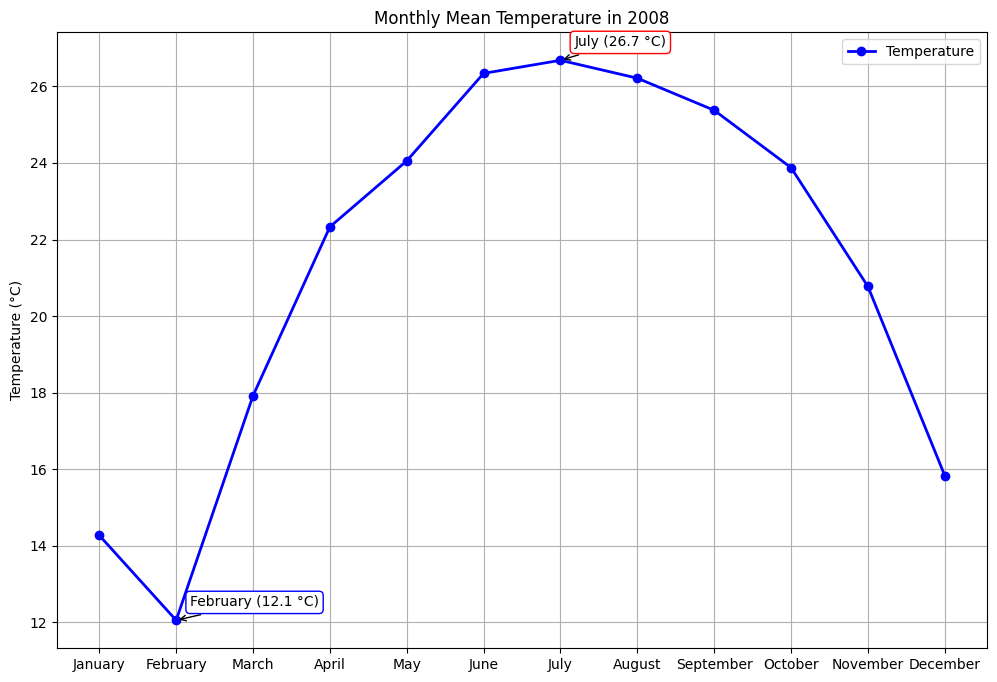

In [6]:
df2 = pd.DataFrame({'Date': date_range, 'Temperature': daily_temp_truncated})
df2['Month'] = df2['Date'].dt.to_period('M')

#Average Temperature
monthly_mean_temps = df2.groupby('Month')['Temperature'].mean()
monthly_mean_temps.index = monthly_mean_temps.index.strftime('%B')
print(monthly_mean_temps)
#Plotting
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax.plot(monthly_mean_temps, linestyle='-', color='b', marker='o', linewidth=2)
ax.set_ylabel('Temperature (°C)')
ax.legend(['Temperature'])


#Highest temp
highest_mean_month = monthly_mean_temps.idxmax()
highest_mean_temp = monthly_mean_temps.max()
plt.annotate(f'{highest_mean_month} ({highest_mean_temp:.1f} °C)',
             xy=(highest_mean_month, highest_mean_temp),
             xytext=(10, 10),
             textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='red', facecolor='white'),
             arrowprops=dict(arrowstyle='->'))

#Lowest temp
lowest_mean_month = monthly_mean_temps.idxmin()
lowest_mean_temp = monthly_mean_temps.min()
plt.annotate(f'{lowest_mean_month} ({lowest_mean_temp:.1f} °C)',
             xy=(lowest_mean_month, lowest_mean_temp),
             xytext=(10, 10),
             textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='blue', facecolor='white'),
             arrowprops=dict(arrowstyle='->'))

plt.title("Monthly Mean Temperature in 2008")
plt.grid(True)

plt.show()




